In [1]:
%matplotlib inline
from ipywidgets import interact,widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns
from matplotlib.dates import date2num

In [2]:
def plot_posts_price(name,percent, page_in_posts=False) :
    total = pd.read_csv(
    f'data/{name}_posts.csv', 
    usecols = [1,2],
    parse_dates=[0])
    total.columns =['datetime','id']
    c = total.groupby(pd.Grouper(key='datetime',freq='1D')).size()

    ## 가격 data 불러오기
    sol = pd.read_csv(f'data/{name}_price.csv',parse_dates=['Date'],index_col='Date')
    BM = (sol.index >= '2021-03-01') & (sol.index <= '2022-04-24')
    sol_time = sol[BM]['Close']


    ### sol_time있는 게시글만 뽑기
    c_sort = c[sol_time.index][c>np.quantile(c,percent)]

    # ### 전날 대비 post 증가개수
    # c_1 = np.concatenate((np.array([0]), c.values[:-1]))
    # k = c- c_1
    # k[k < 0] = 0
    
### Close > 20 > 60 면적 보라색으로 칠하기
    price_total = sol[BM]
    BM_2 = (price_total['Close'] >= price_total['20']) & (price_total['20'] >= price_total['60'])
    price_area = price_total[BM_2]
    date_to_num = date2num(price_area.index)
    date_to_num_plus_1 = np.append(date_to_num,19004)[1:]
    different_value = date_to_num_plus_1 - date_to_num 
    finding_range = np.where(different_value > 4)
    range_days =[]
    for i in range(len(finding_range[0])) :
        if i == 0 :
            k = date_to_num[:finding_range[0][i]+1]
        else :
            k = date_to_num[finding_range[0][i-1]+1 : finding_range[0][i]+1]
        if len(k) > 1 :
            range_days.append(k.tolist())


    ### 가격 plot
    fig, ax1 = plt.subplots(figsize=(14,6))
    fig.suptitle('Finding correation the number of posts and Price', fontsize=20)
    ax1.bar(c_sort.index,height=c_sort, color='tab:orange')
    ax1.tick_params(axis='y')
    ax1.set_ylabel('num of posts', fontsize=14)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Price',fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(sol_time,label='price[close]')
    ax2.tick_params(axis='y')
    ax2.plot(sol[BM]['20'], label='price[20]')
    ax2.plot(sol[BM]['60'], label='price[60]')
    ax2.grid(False)
    ax2.legend()
    for day in range_days : 
        # if page_in_posts == True : 
        #     index_num =[]
        #     for i, num in enumerate(date_to_num) :
        #         if num in day :
        #             index_num.append(i)
        #     ax1.bar(day,height=c[index_num], color='tab:orange')
        ax1.axvspan(day[0],day[-1], facecolor='tab:purple', alpha=0.2) #edgecolor='gold'

In [3]:
plt.style.use('seaborn-dark')
# sns.set_palette('BrBG')
data_df = os.listdir('./data')
name = [re.sub('_posts.csv','',i) for i in data_df if '_posts.csv' in i ]

interact(plot_posts_price, name =name, percent=widgets.FloatSlider(min=0.04,max=0.99,step=0.05, value=0.85))

interactive(children=(Dropdown(description='name', options=('DB손해보험', 'ISC', 'JYP Ent.', 'KG스틸', 'KG케미칼', 'KT'…

<function __main__.plot_posts_price(name, percent, page_in_posts=False)>

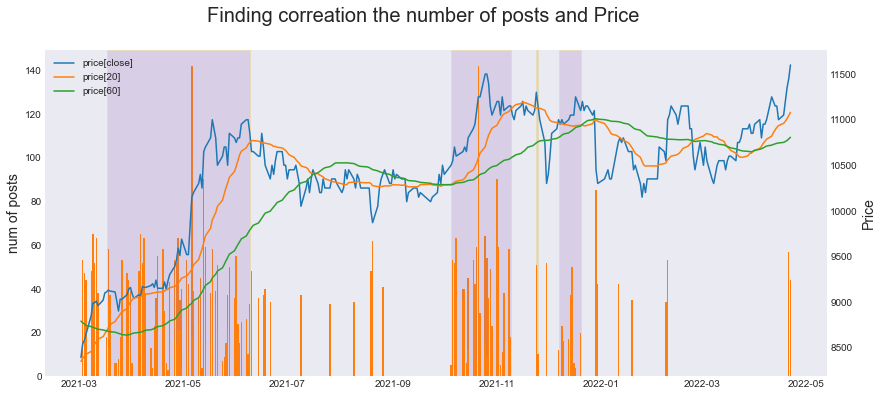

In [4]:
from matplotlib.dates import date2num
name ='기업은행'
percent = 0.85
total = pd.read_csv(
f'data/{name}_posts.csv', 
usecols = [1,2],
parse_dates=[0])
total.columns =['datetime','id']
c = total.groupby(pd.Grouper(key='datetime',freq='1D')).size()

## 가격 data 불러오기
sol = pd.read_csv(f'data/{name}_price.csv',parse_dates=['Date'],index_col='Date')
BM = (sol.index >= '2021-03-01') & (sol.index <= '2022-04-24')
sol_time = sol[BM]['Close']


### sol_time있는 게시글만 뽑기
c_sort = c[sol_time.index][c>np.quantile(c,percent)]

### Close > 20 > 60 면적 보라색으로 칠하기
price_total = sol[BM]
BM_2 = (price_total['Close'] >= price_total['20']) & (price_total['20'] >= price_total['60'])
price_area = price_total[BM_2]
date_to_num = date2num(price_area.index)
date_to_num_plus_1 = np.append(date_to_num,19004)[1:]
different_value = date_to_num_plus_1 - date_to_num 
finding_range = np.where(different_value > 4)
range_days =[]
for i in range(len(finding_range[0])) :
    if i == 0 :
        k = date_to_num[:finding_range[0][i]+1]
    else :
        k = date_to_num[finding_range[0][i-1]+1 : finding_range[0][i]+1]
    if len(k) > 1 :
        range_days.append(k.tolist())


### 가격 plot
fig, ax1 = plt.subplots(figsize=(14,6))
fig.suptitle('Finding correation the number of posts and Price', fontsize=20)
ax1.bar(c_sort.index,height=c_sort, color='tab:orange')
ax1.tick_params(axis='y')
ax1.set_ylabel('num of posts', fontsize=14)
ax2 = ax1.twinx()
ax2.set_ylabel('Price',fontsize=14)  # we already handled the x-label with ax1
ax2.plot(sol_time,label='price[close]')
ax2.tick_params(axis='y')
ax2.plot(sol[BM]['20'], label='price[20]')
ax2.plot(sol[BM]['60'], label='price[60]')
ax2.grid(False)
ax2.legend()
for day in range_days : 
    index_num =[]
    for i, num in enumerate(date_to_num) :
        if num in day :
            index_num.append(i)
    ax1.axvspan(day[0],day[-1], facecolor='tab:purple', edgecolor='gold', alpha=0.2)
    ax1.bar(day,height=c[index_num], color='tab:orange')

In [5]:
range_days =[]
for i in range(len(finding_range[0])) :
    if i == 0 :
        k = date_to_num[:finding_range[0][i]+1]
    else :
        k = date_to_num[finding_range[0][i-1]+1 : finding_range[0][i]+1]
    if len(k) > 1 :
        range_days.append(k.tolist())
range_days

[[18703.0,
  18704.0,
  18705.0,
  18708.0,
  18709.0,
  18710.0,
  18711.0,
  18712.0,
  18715.0,
  18716.0,
  18717.0,
  18718.0,
  18722.0,
  18723.0,
  18724.0,
  18725.0,
  18726.0,
  18729.0,
  18730.0,
  18731.0,
  18732.0,
  18733.0,
  18736.0,
  18737.0,
  18738.0,
  18739.0,
  18740.0,
  18743.0,
  18744.0,
  18745.0,
  18746.0,
  18747.0,
  18750.0,
  18751.0,
  18753.0,
  18754.0,
  18757.0,
  18758.0,
  18759.0,
  18760.0,
  18761.0,
  18764.0,
  18765.0,
  18767.0,
  18768.0,
  18771.0,
  18772.0,
  18773.0,
  18774.0,
  18775.0,
  18778.0,
  18779.0,
  18780.0,
  18781.0,
  18782.0,
  18785.0,
  18786.0,
  18787.0],
 [18905.0,
  18906.0,
  18907.0,
  18908.0,
  18912.0,
  18913.0,
  18914.0,
  18915.0,
  18918.0,
  18919.0,
  18920.0,
  18921.0,
  18922.0,
  18925.0,
  18926.0,
  18927.0,
  18928.0,
  18929.0,
  18932.0,
  18933.0,
  18934.0,
  18935.0,
  18936.0,
  18939.0,
  18940.0],
 [18955.0, 18956.0],
 [18968.0,
  18970.0,
  18971.0,
  18974.0,
  18975.0,
  18976.0

In [6]:
price_total = sol[BM]
BM_2 = (price_total['Close'] >= price_total['20']) & (price_total['20'] >= price_total['60'])
price_area = price_total[BM_2]
date_to_num = date2num(price_area.index)
date_to_num_plus_1 = np.append(date_to_num,19004)[1:]
different_value = date_to_num_plus_1 - date_to_num 
finding_range = np.where(different_value > 4)
range_days =[]
for i in range(len(finding_range[0])) :
    if i == 0 :
        k = date_to_num[:finding_range[0][i]+1]
    else :
        k = date_to_num[finding_range[0][i-1]+1 : finding_range[0][i]+1]
    if len(k) > 1 :
        range_days.append(k.tolist())
print(range_days)

[[18703.0, 18704.0, 18705.0, 18708.0, 18709.0, 18710.0, 18711.0, 18712.0, 18715.0, 18716.0, 18717.0, 18718.0, 18722.0, 18723.0, 18724.0, 18725.0, 18726.0, 18729.0, 18730.0, 18731.0, 18732.0, 18733.0, 18736.0, 18737.0, 18738.0, 18739.0, 18740.0, 18743.0, 18744.0, 18745.0, 18746.0, 18747.0, 18750.0, 18751.0, 18753.0, 18754.0, 18757.0, 18758.0, 18759.0, 18760.0, 18761.0, 18764.0, 18765.0, 18767.0, 18768.0, 18771.0, 18772.0, 18773.0, 18774.0, 18775.0, 18778.0, 18779.0, 18780.0, 18781.0, 18782.0, 18785.0, 18786.0, 18787.0], [18905.0, 18906.0, 18907.0, 18908.0, 18912.0, 18913.0, 18914.0, 18915.0, 18918.0, 18919.0, 18920.0, 18921.0, 18922.0, 18925.0, 18926.0, 18927.0, 18928.0, 18929.0, 18932.0, 18933.0, 18934.0, 18935.0, 18936.0, 18939.0, 18940.0], [18955.0, 18956.0], [18968.0, 18970.0, 18971.0, 18974.0, 18975.0, 18976.0, 18977.0, 18978.0, 18981.0]]


In [7]:
# a = price_total[BM_2]
# plt.plot(a['Close'])
# plt.plot(a['20'])
# plt.plot(a['60'])
